In [13]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

def lgb_model_init(X_train,y_train):
    lgb_clf=LGBMClassifier()
    lgb_clf.fit(X_train,y_train)
    
    return lgb_clf

def lgb_model_tuned(X_train,y_train):
    grid_search = {'num_leaves': [11,21,31],
               'min_child_samples': [15, 20, 25],
               'learning_rate': [0.1,0.07,0.05],
               'n_estimators': [50,100]}
    clf = LGBMClassifier()
    grid = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 5, verbose= 5, n_jobs = -1)
    grid.fit(X_train,y_train)
    
    lgb_model=grid.best_estimator_
    return lgb_model

In [1]:
import import_ipynb
from preprocessing import load_data
from sklearn.model_selection import train_test_split

importing Jupyter notebook from preprocessing.ipynb


[IterativeImputer] Completing matrix with shape (143983, 63)
[IterativeImputer] Ending imputation round 1/20, elapsed time 20.88
[IterativeImputer] Change: 4339717.718252908, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 2/20, elapsed time 39.90
[IterativeImputer] Change: 109178.47474219964, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 3/20, elapsed time 60.13
[IterativeImputer] Change: 61326.23123222231, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 4/20, elapsed time 81.07
[IterativeImputer] Change: 47768.54785351781, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 5/20, elapsed time 101.84
[IterativeImputer] Change: 34219.36236036712, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 6/20, elapsed time 122.88
[IterativeImputer] Change: 22454.161775678534, scaled tolerance: 16508.0 
[IterativeImputer] Ending imputation round 7/20, elapsed time 142.89
[IterativeImputer] C

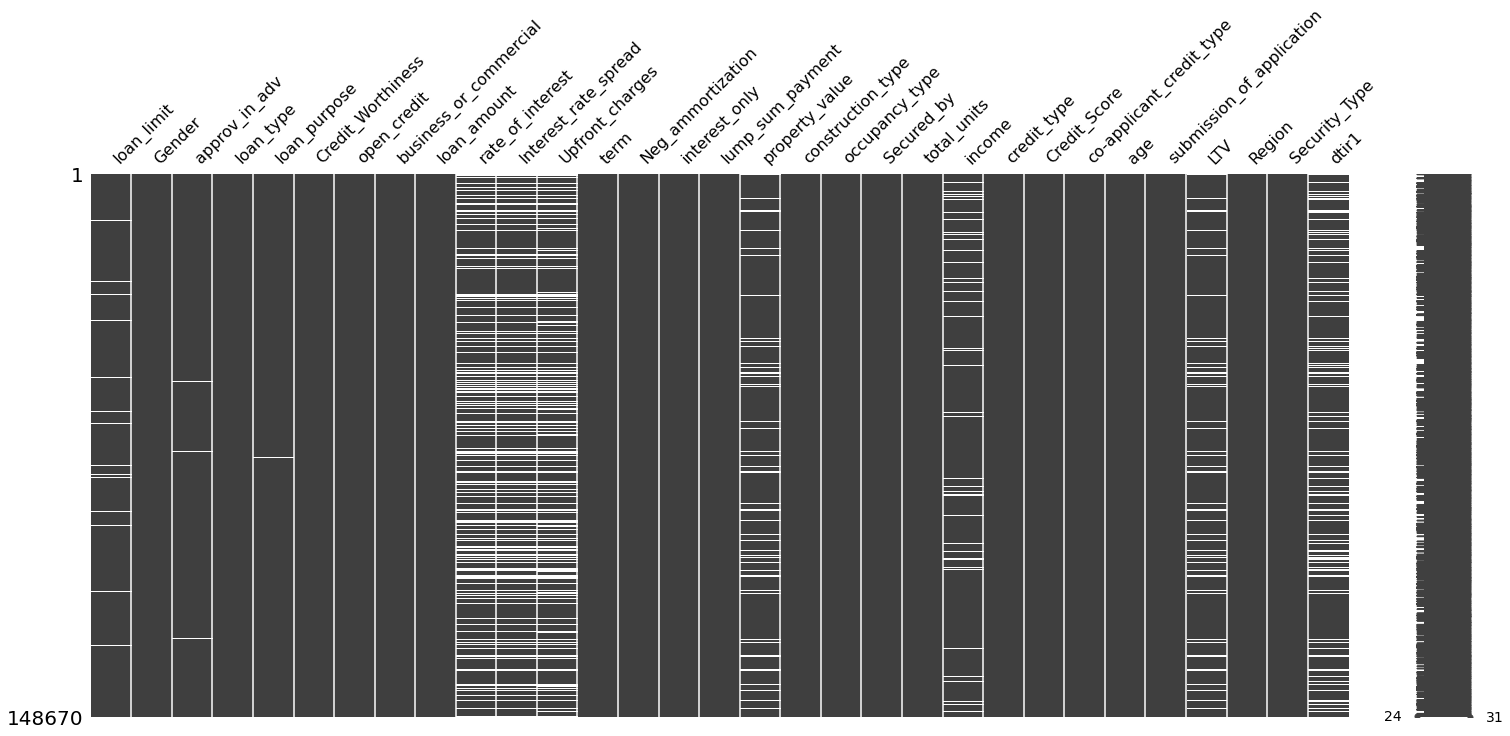

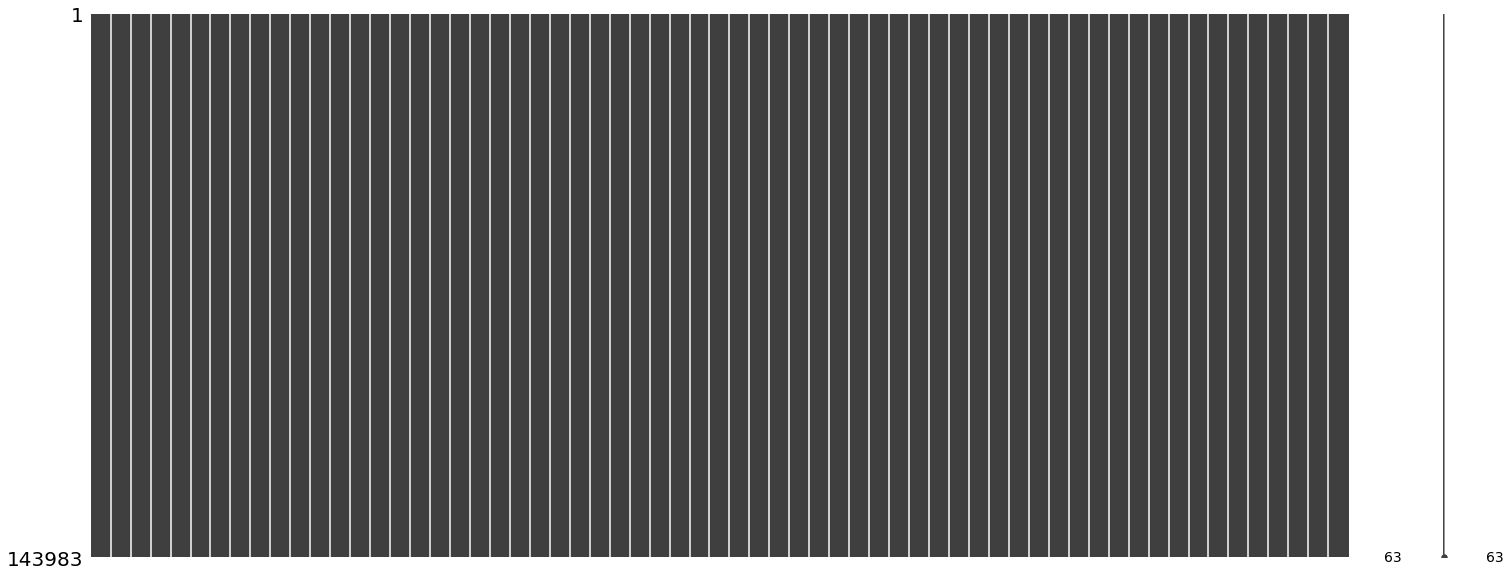

In [2]:
data,target = load_data('data/Loan_Default.csv')

In [3]:
X_train,X_test,y_train,y_test = train_test_split(data,target,train_size=0.7,random_state=2022)

In [7]:
model = lgb_model_init(X_train,y_train)

In [9]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [15]:
model_tuned = lgb_model_tuned(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [17]:
model_tuned.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_samples': 25,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}